In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import re

import sklearn
import pandas as pd

In [3]:
import numpy as np

def mean_spectrum_derivatives(mean_spec):
    """
    Compute the mean spectrum and its first and second derivatives.

    Parameters
    ----------
    mean_spec : list or array
        Mean spectrum
    wavelengths : np.ndarray
        1D array of band center wavelengths, same length as number of bands.

    Returns
    -------
    first_deriv : np.ndarray
        First derivative (dS/dλ).
    second_deriv : np.ndarray
        Second derivative (d²S/dλ²).
    """
    feature_cols = [col for col in mean_spec.columns if col not in ["class", "day", "sample_id"]]
    df = mean_spec[feature_cols]
    # Compute derivatives row by row
    d1 = pd.DataFrame(
        np.gradient(df.values, axis=1),
        columns=df.columns,
        index=df.index
    )

    d2 = pd.DataFrame(
        np.gradient(d1.values, axis=1),
        columns=df.columns,
        index=df.index
    )

    return d1, d2



## VIS-NIR

In [4]:
# Read spectras from different imaging days
day2 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/raw/raw_average_spectra_day2.csv")
day5 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/raw/raw_average_spectra_day5.csv")
day7 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/raw/raw_average_spectra_day7.csv")
day9 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/raw/raw_average_spectra_day9.csv")


In [5]:
day2.drop(columns=["Unnamed: 0", "image_id"], inplace=True)
day5.drop(columns=["Unnamed: 0", "image_id"], inplace=True)
day7.drop(columns=["Unnamed: 0", "image_id"], inplace=True)
day9.drop(columns=["Unnamed: 0", "image_id"], inplace=True)


In [6]:
day2["class"] = day2["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day5["class"] = day5["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day7["class"] = day7["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day9["class"] = day9["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})


In [23]:
day2_mean = day2.groupby("class").mean()
day5_mean = day5.groupby("class").mean()
day7_mean = day7.groupby("class").mean()
day9_mean = day9.groupby("class").mean()

day2_std = day2.groupby("class").std()
day5_std = day5.groupby("class").std()
day7_std = day7.groupby("class").std()
day9_std = day9.groupby("class").std()

In [15]:
# Get the wavelengths as a list of floats for plotting
wavelengths = []
for col in day2_mean.columns:
    match = re.match(r"(\d+)", col)
    if match:  # column starts with numbers (e.g. 420nm)
        wavelengths.append(float(match.group(1)))

In [28]:
day2_mean.reset_index(inplace=True)
day5_mean.reset_index(inplace=True)
day7_mean.reset_index(inplace=True)
day9_mean.reset_index(inplace=True)


In [29]:
# Get the wavelengths as a list of floats for plotting
wavelengths = []
for col in day2_mean.columns:
    match = re.match(r"(\d+)", col)
    if match:  # column starts with numbers (e.g. 420nm)
        wavelengths.append(float(match.group(1)))

/tmp/ipython-input-4271648520.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fderiv = pd.concat([df_fderiv, new], axis=0, ignore_index=True)


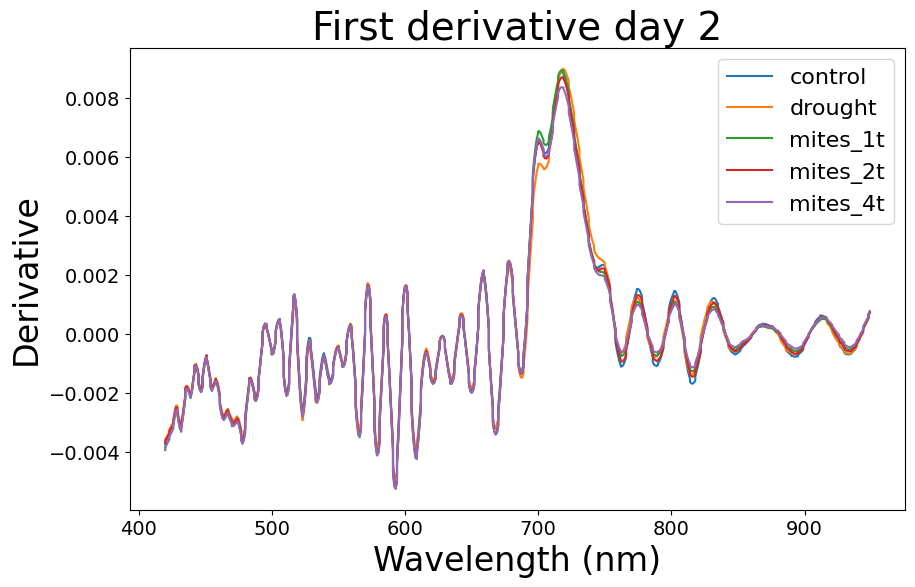

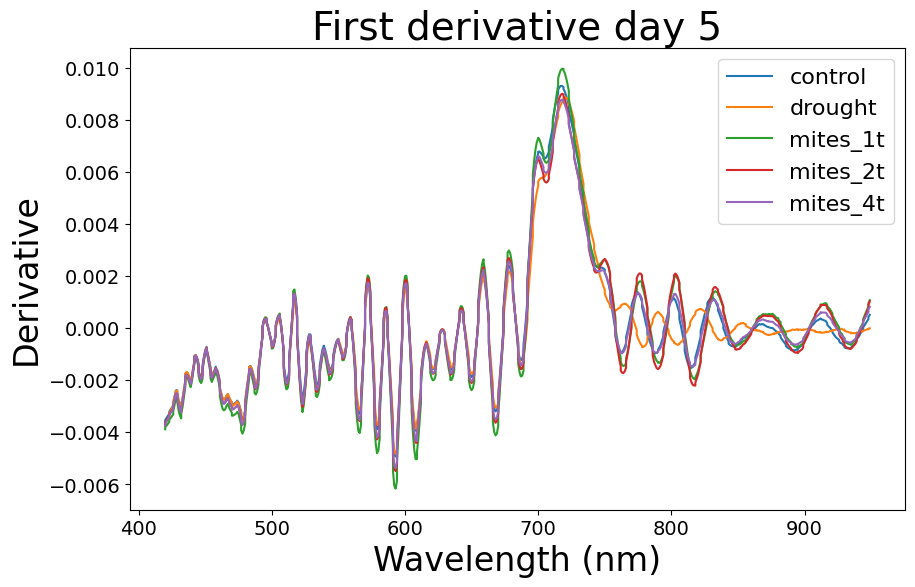

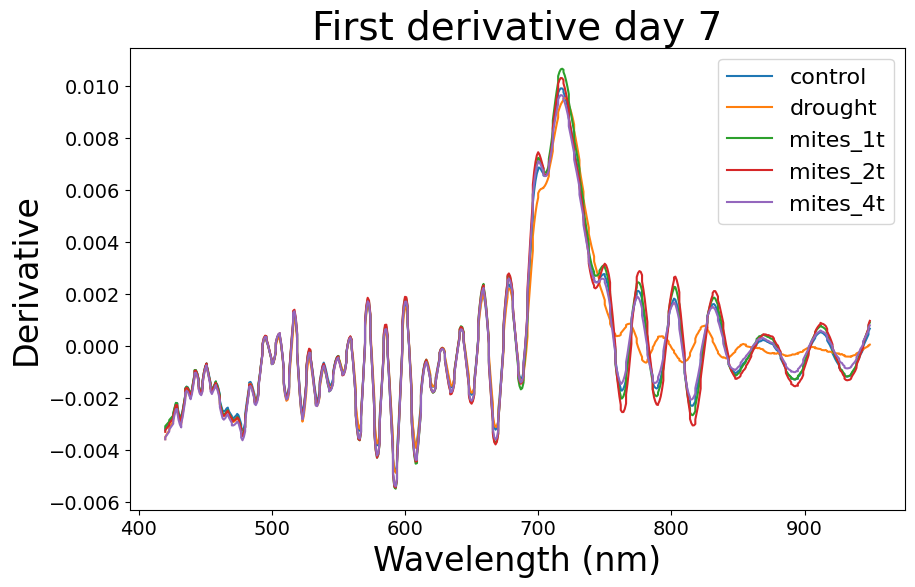

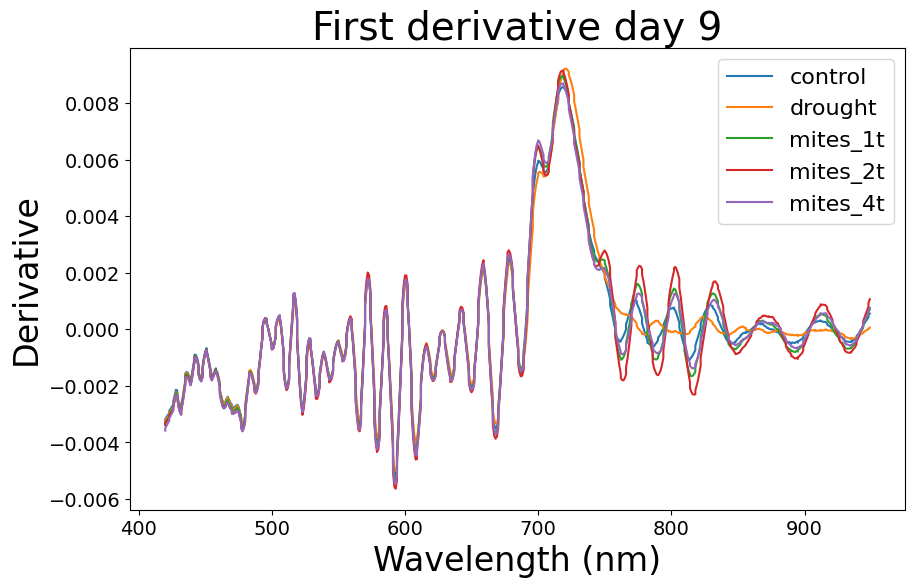

In [32]:
from scipy.signal import savgol_filter
import pandas as pd
import matplotlib.pyplot as plt

feature_cols = [col for col in day2_mean.columns if col != "class"]
days = [2, 5, 7, 9]

# empty df with proper columns
df_fderiv = pd.DataFrame(columns=feature_cols + ["day", "class"])
for day_df, day_num in zip([day2_mean, day5_mean, day7_mean, day9_mean], days):
    # First derivative
    fderiv = savgol_filter(
        x=day_df[feature_cols].to_numpy(),
        window_length=17,
        polyorder=2,
        axis=1,
        deriv=1,
    )

    # Build new rows for this day
    new = pd.DataFrame(fderiv, columns=feature_cols)
    new["class"] = day_df["class"].values
    new["day"] = day_num

    # Accumulate into df
    df_fderiv = pd.concat([df_fderiv, new], axis=0, ignore_index=True)

    # Plot only this day's spectra
    plt.figure(figsize=(10, 6))
    for idx, row in new[feature_cols].iterrows():
        plt.plot(wavelengths, row, label=new.loc[idx, "class"])

    plt.legend(fontsize=16)
    plt.title(f"First derivative day {day_num}", fontsize=28)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Wavelength (nm)", fontsize=24)
    plt.ylabel("Derivative", fontsize=24)
    #plt.savefig(f"/content/drive/MyDrive/Master/data/plots/raw_first_deriv_day{day_num}_sg.png", dpi=400)
    plt.show()


/tmp/ipython-input-2633946793.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_sderiv = pd.concat([df_sderiv, new], axis=0, ignore_index=True)


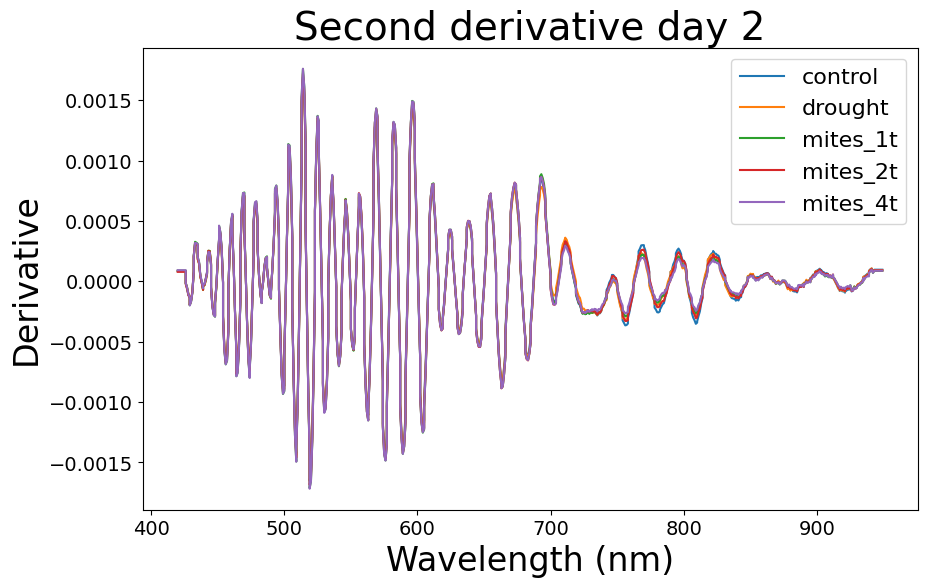

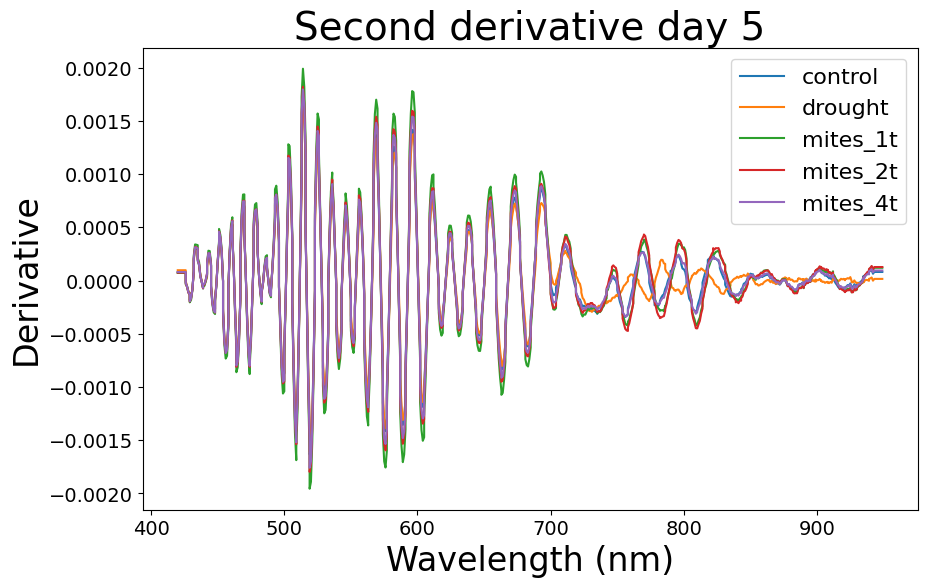

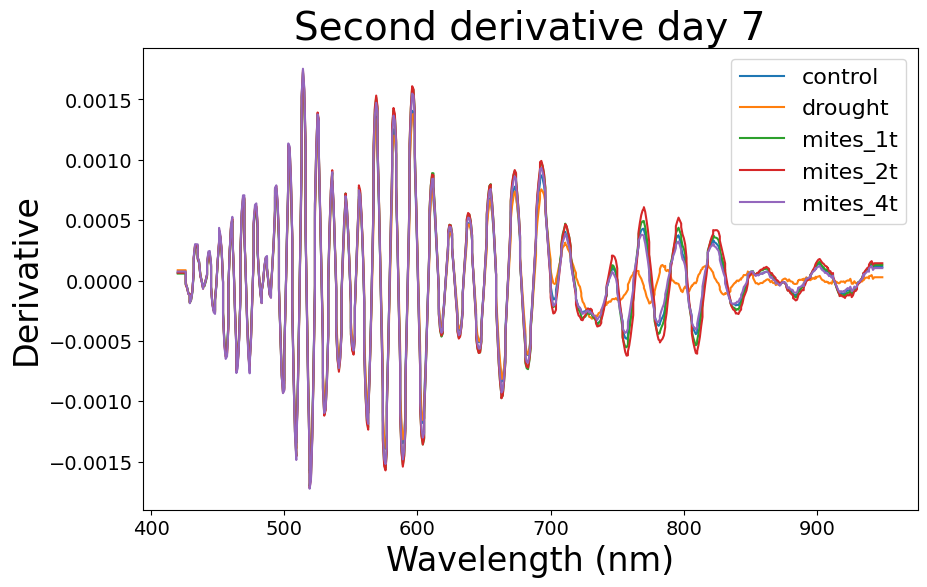

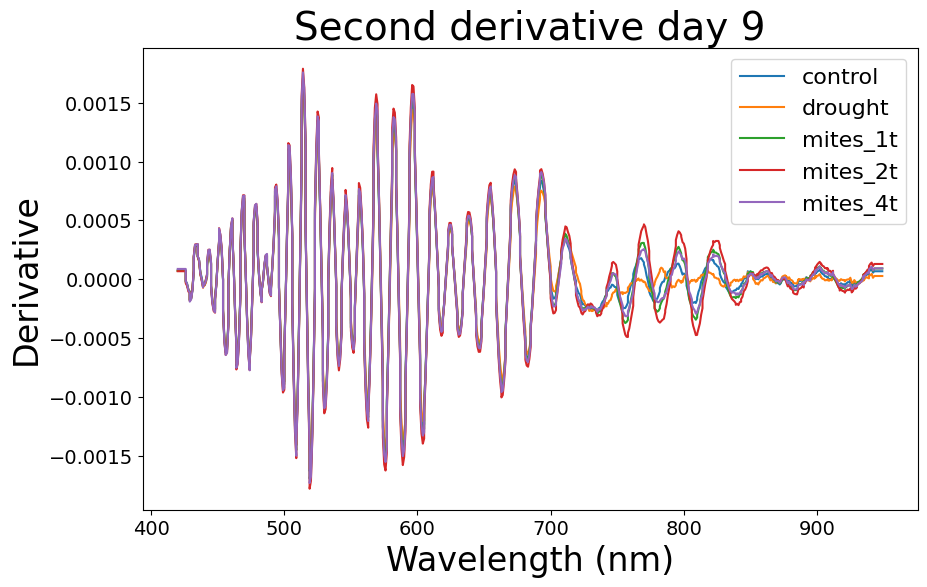

In [33]:
from scipy.signal import savgol_filter
import pandas as pd
import matplotlib.pyplot as plt

feature_cols = [col for col in day2_mean.columns if col != "class"]
days = [2, 5, 7, 9]

# empty df with proper columns
df_sderiv = pd.DataFrame(columns=feature_cols + ["day", "class"])

for day_df, day_num in zip([day2_mean, day5_mean, day7_mean, day9_mean], days):
    # First derivative
    sderiv = savgol_filter(
        x=day_df[feature_cols].to_numpy(),
        window_length=17,
        polyorder=2,
        axis=1,
        deriv=2,
    )

    # Build new rows for this day
    new = pd.DataFrame(sderiv, columns=feature_cols)
    new["class"] = day_df["class"].values
    new["day"] = day_num

    # Accumulate into df
    df_sderiv = pd.concat([df_sderiv, new], axis=0, ignore_index=True)

    # Plot only this day's spectra
    plt.figure(figsize=(10, 6))
    for idx, row in new[feature_cols].iterrows():
        plt.plot(wavelengths, row, label=new.loc[idx, "class"])

    plt.legend(fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"Second derivative day {day_num}", fontsize=28)
    plt.xlabel("Wavelength (nm)", fontsize=24)
    plt.ylabel("Derivative", fontsize=24)

    #plt.savefig(f"/content/drive/MyDrive/Master/data/plots/raw_second_deriv_day{day_num}_sg.png", dpi=400)
    plt.show()

## SWIR

In [ ]:
# Read spectras from different imaging days
day2 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/raw/raw_average_spectra_day2.csv")
day5 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/raw/raw_average_spectra_day5.csv")
day7 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/raw/raw_average_spectra_day7.csv")
day9 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/swir/raw/raw_average_spectra_day9.csv")


In [ ]:
day2['class'] = day2['image_id'].str.split('_').str[:2].str.join('_')
day5['class'] = day5['image_id'].str.split('_').str[:2].str.join('_')
day7['class'] = day7['image_id'].str.split('_').str[:2].str.join('_')
day9['class'] = day9['image_id'].str.split('_').str[:2].str.join('_')


In [ ]:
day2["class"] = day2["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day5["class"] = day5["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day7["class"] = day7["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day9["class"] = day9["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
day9 = day9[day9["class"] != "clean_klipp"]


In [ ]:
day2.drop(columns=["image_id"], inplace=True)
day5.drop(columns=["image_id"], inplace=True)
day7.drop(columns=["image_id"], inplace=True)
day9.drop(columns=["image_id"], inplace=True)


In [ ]:
day2_mean = day2.groupby("class").mean()
day5_mean = day5.groupby("class").mean()
day7_mean = day7.groupby("class").mean()
day9_mean = day9.groupby("class").mean()


day2_std = day2.groupby("class").std()
day5_std = day5.groupby("class").std()
day7_std = day7.groupby("class").std()
day9_std = day9.groupby("class").std()

In [ ]:
# Get the wavelengths as a list of floats for plotting
wavelengths = []
for col in day2_mean.columns:
    match = re.match(r"(\d+)", col)
    if match:  # column starts with numbers (e.g. 420nm)
        wavelengths.append(float(match.group(1)))

In [ ]:
day2_mean.reset_index(inplace=True)
day5_mean.reset_index(inplace=True)
day7_mean.reset_index(inplace=True)
day9_mean.reset_index(inplace=True)


/tmp/ipython-input-2971787464.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fderiv_swir = pd.concat([df_fderiv_swir, new], axis=0, ignore_index=True)


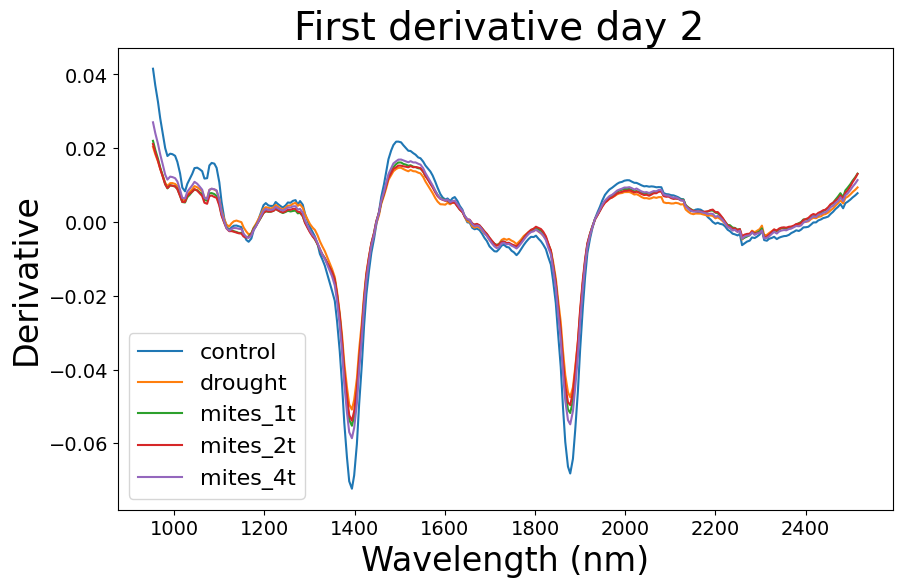

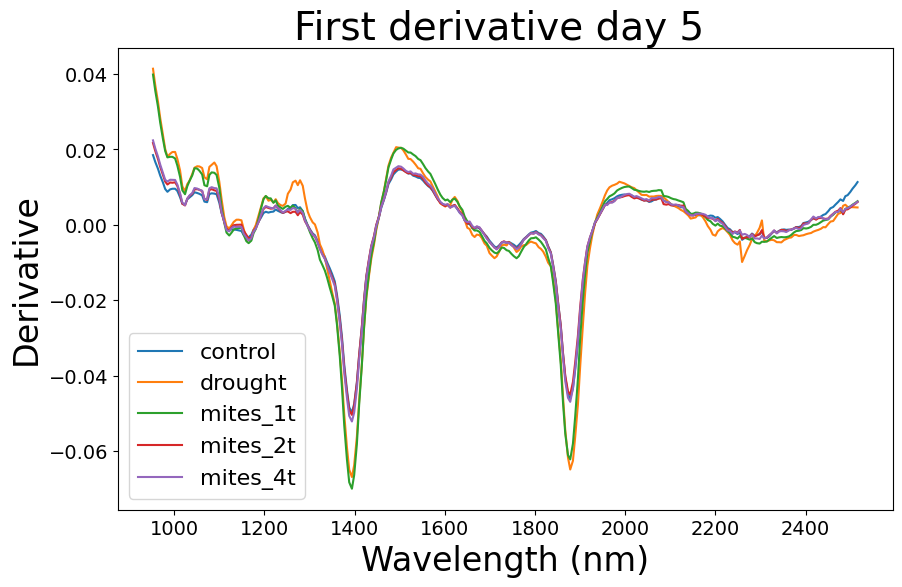

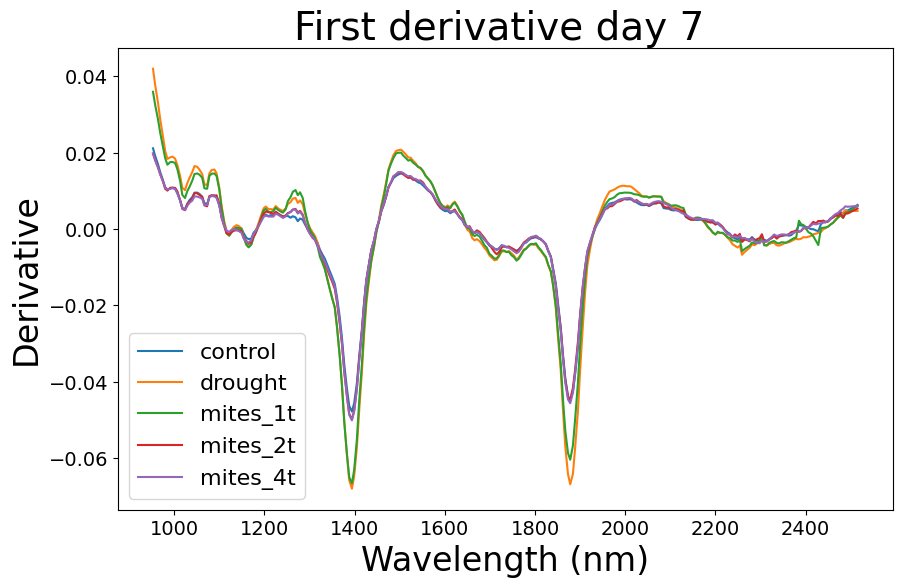

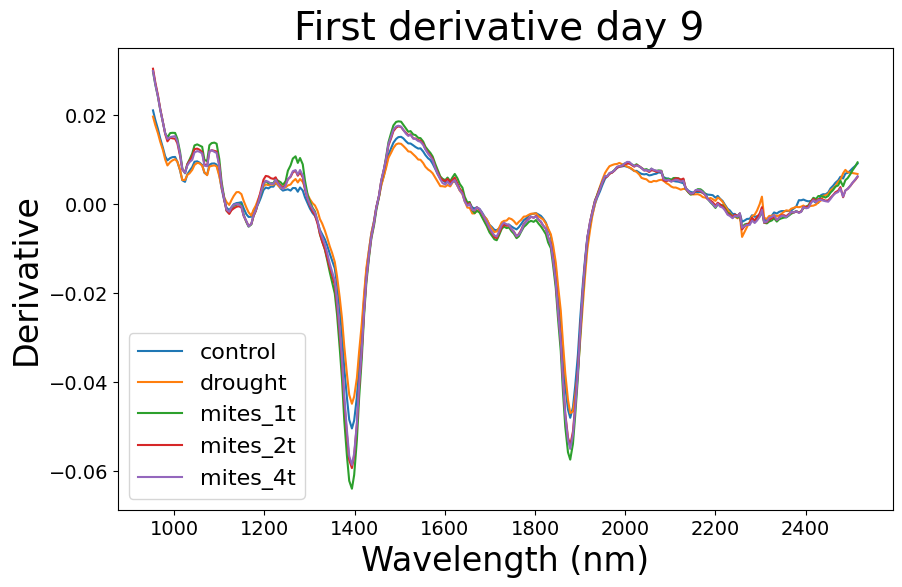

In [ ]:
from scipy.signal import savgol_filter
feature_cols = [col for col in day2_mean.columns if col not in ["class"]]
days = [2, 5, 7, 9 ]
i = 0
df_fderiv_swir = pd.DataFrame(columns=feature_cols + ["day", "class"])

for day, day_num in zip([day2_mean, day5_mean, day7_mean, day9_mean], days):
  ix = 0
  #fderiv, sderiv = mean_spectrum_derivatives(day)


  fderiv = savgol_filter(
        x=day[feature_cols].to_numpy(), window_length=9, polyorder=2, axis=1,
        deriv=1)

  # Build new rows for this day
  new = pd.DataFrame(fderiv, columns=feature_cols)
  new["class"] = day["class"].values
  new["day"] = day_num

  # Accumulate into df
  df_fderiv_swir = pd.concat([df_fderiv_swir, new], axis=0, ignore_index=True)

  plt.figure(figsize=(10, 6))
  for row in new[feature_cols].iterrows():
    plt.plot(wavelengths, row[1], label=new.loc[ix]["class"])
    plt.legend(fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"First derivative day {days[i]} ", fontsize=28)
    plt.xlabel("Wavelength (nm)", fontsize=24)
    plt.ylabel("Derivative", fontsize=24)

    ix += 1
  plt.savefig(f"/content/drive/MyDrive/Master/data/plots/swir_raw_first_deriv_day{days[i]}_sg.png", dpi=400)
  i += 1
  plt.show()

/tmp/ipython-input-2931101733.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_sderiv_swir = pd.concat([df_sderiv_swir, new], axis=0, ignore_index=True)


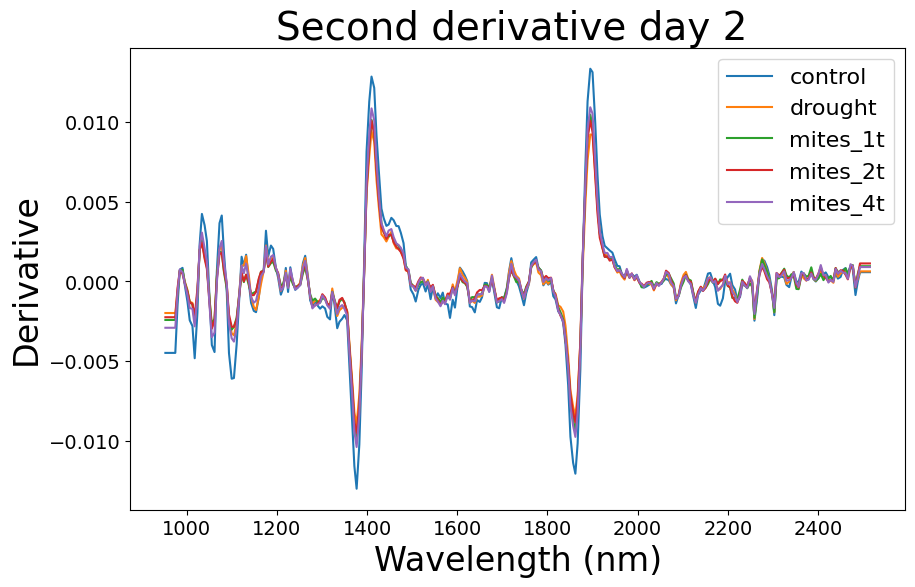

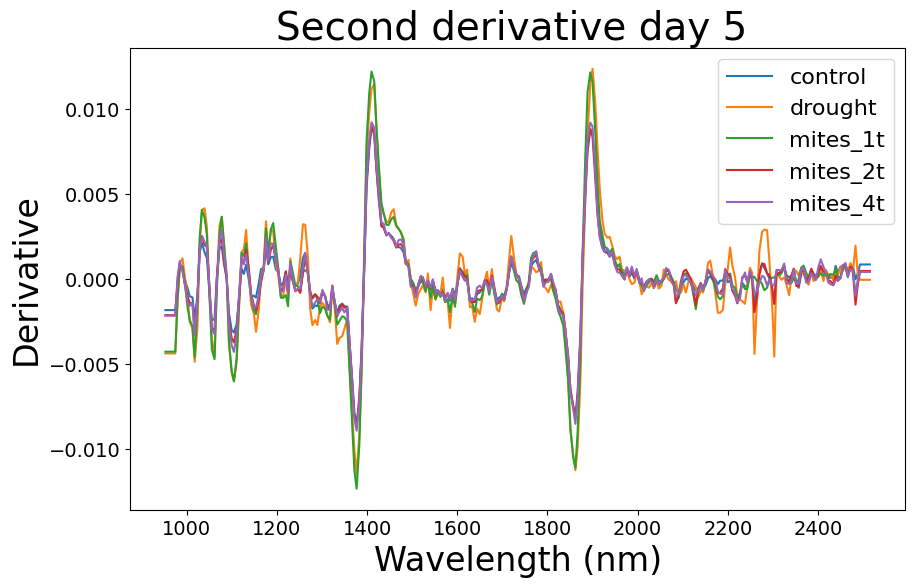

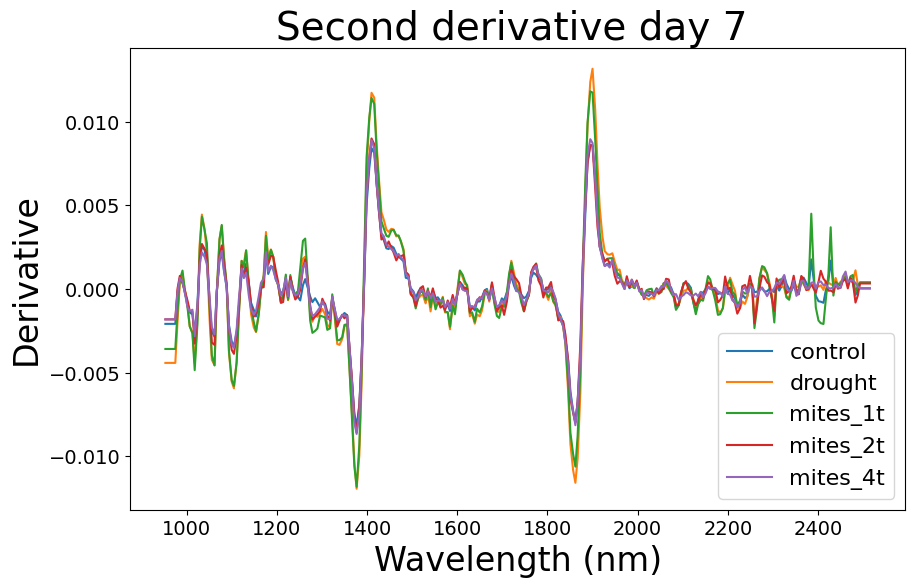

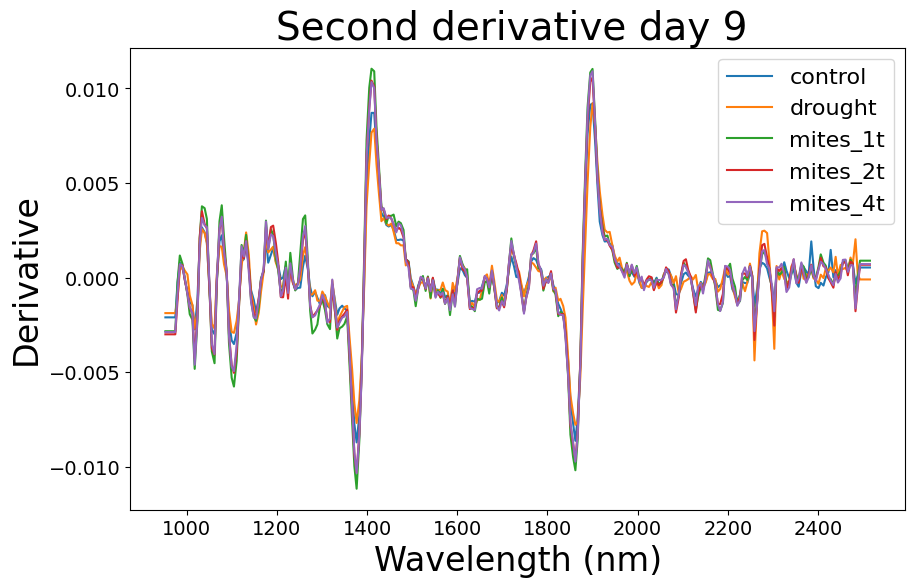

In [ ]:
from scipy.signal import savgol_filter
feature_cols = [col for col in day2_mean.columns if col not in ["class"]]
days = [2, 5, 7, 9 ]
i = 0
df_sderiv_swir = pd.DataFrame(columns=feature_cols + ["day", "class"])

for day, day_num in zip([day2_mean, day5_mean, day7_mean, day9_mean], days):
  ix = 0
  #fderiv, sderiv = mean_spectrum_derivatives(day)


  sderiv = savgol_filter(
        x=day[feature_cols].to_numpy(), window_length=9, polyorder=2, axis=1,
        deriv=2)

  # Build new rows for this day
  new = pd.DataFrame(sderiv, columns=feature_cols)
  new["class"] = day["class"].values
  new["day"] = day_num

  # Accumulate into df
  df_sderiv_swir = pd.concat([df_sderiv_swir, new], axis=0, ignore_index=True)

  plt.figure(figsize=(10, 6))
  for row in new[feature_cols].iterrows():
    plt.plot(wavelengths, row[1], label=new.loc[ix]["class"])
    plt.legend(fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"Second derivative day {days[i]} ", fontsize=28)
    plt.xlabel("Wavelength (nm)", fontsize=24)
    plt.ylabel("Derivative", fontsize=24)

    ix += 1
  plt.savefig(f"/content/drive/MyDrive/Master/data/plots/swir_raw_second_deriv_day{days[i]}_sg.png", dpi=400)
  i += 1
  plt.show()